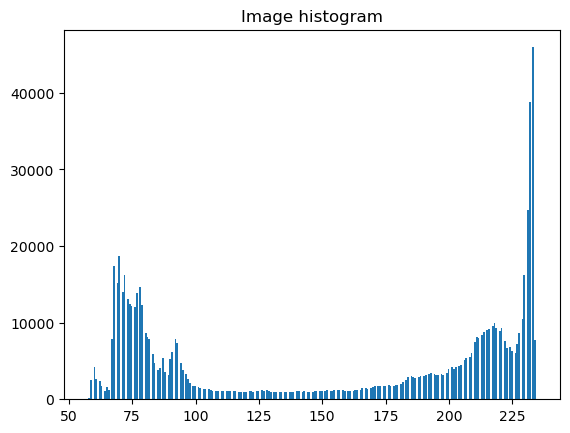

In [1]:
from skimage import color, io, measure, img_as_ubyte, img_as_float
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
import numpy as np

in_dir = "data/"
im_name = "vertebra.png"

im_org = io.imread(in_dir + im_name)
plt.hist(im_org.ravel(), bins=256)
plt.title('Image histogram')
io.show()

# Histogram is bimodal

min value:  57
max value:  235


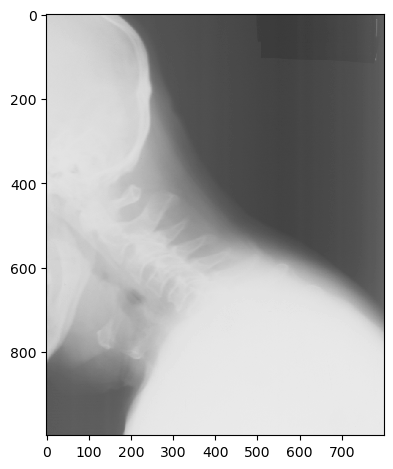

In [2]:
io.imshow(im_org)
print("min value: ", im_org.min())
print("max value: ", im_org.max())
# full scale of gray-scale spectrum is not used
# picture can be further enhanced

In [3]:
im_float = img_as_float(im_org)
print("min value: ", min(im_float.ravel()))
print("max value: ", max(im_float.ravel()))
print("rescaled min value: ", im_float.min()*255)
print("rescaled max value: ", im_float.max()*255)
# verfified that float img = original img

min value:  0.22352941176470587
max value:  0.9215686274509803
rescaled min value:  56.99999999999999
rescaled max value:  235.0


In [4]:
im_byte = img_as_ubyte(im_float)
print("min value: ", min(im_byte.ravel()))
print("max value: ", max(im_byte.ravel()))
# yes, as expected.

min value:  57
max value:  235


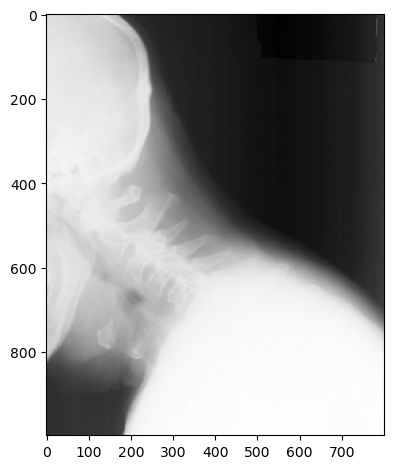

In [5]:
def histogram_stretch(img_in):
    """
    Stretches the histogram of an image 
    :param img_in: Input image
    :return: Image, where the histogram is stretched so the min values is 0 and the maximum value 255
    """
    # img_as_float will divide all pixel values with 255.0
    img_float = img_as_float(img_in)
    min_val = img_float.min()
    max_val = img_float.max()
    min_desired = 0.0
    max_desired = 1.0

    # Do something here
    img_out = img_float
    for i in range(img_in.shape[0]):
        for j in range(img_in.shape[1]):
            new = (img_float[i,j] - min_val)*(max_desired - min_desired)/(max_val - min_val) + min_desired
            img_out[i,j] = new
    
    # img_as_ubyte will multiply all pixel values with 255.0 before converting to unsigned byte
    return img_as_ubyte(img_out)

im_stretched = histogram_stretch(im_org)
io.imshow(im_stretched)


In [6]:
print(im_org.shape[0],im_org.shape[1])


998 800


In [7]:
def gamma_map(img_in, gamma):
    """
    Apply gamma mapping to an image 
    :param img_in: Input image, gamma value
    :return: Image, with gamma mapping applied
    """
    # img_as_float will divide all pixel values with 255.0
    img_float = img_as_float(img_in)
   
    # Do something here
    img_out = np.power(img_float,np.ones(img_float.shape)*gamma)
    
    # img_as_ubyte will multiply all pixel values with 255.0 before converting to unsigned byte
    return img_as_ubyte(img_out)


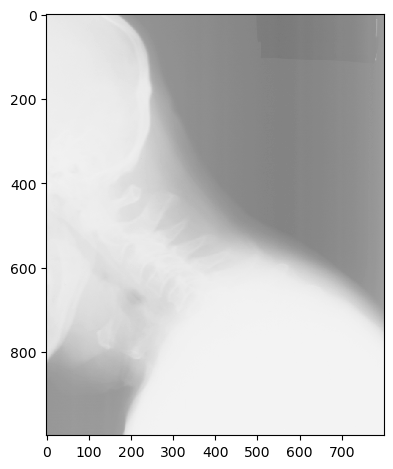

In [8]:
im_gamma = gamma_map(im_org, 0.5)
io.imshow(im_gamma)

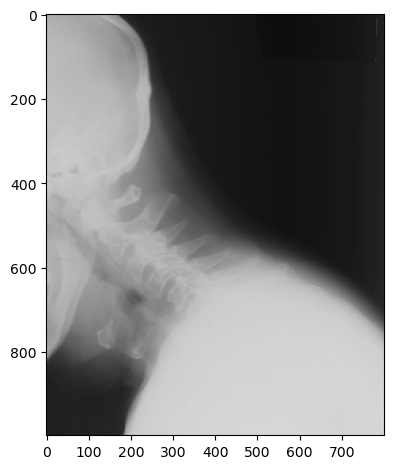

In [9]:
im_gamma = gamma_map(im_org, 2)
io.imshow(im_gamma)

In [10]:
def threshold_image(img_in, thres):
    """
    Apply a threshold in an image and return the resulting image
    :param img_in: Input image
    :param thres: The treshold value in the range [0, 255]
    :return: Resulting image (unsigned byte) where background is 0 and foreground is 255
    """
    img_out = img_in > thres
    
    return img_as_ubyte(img_out)


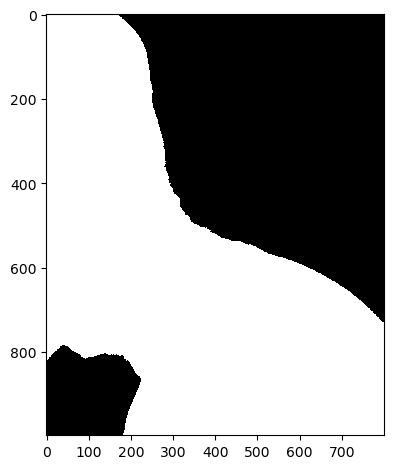

In [11]:
im_thres = threshold_image(im_org, 145)
io.imshow(im_thres)

Otsu Threshold:  148


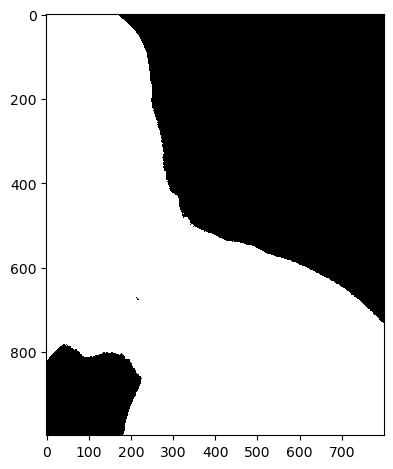

In [12]:
print("Otsu Threshold: ", threshold_otsu(im_org))
im_thres = threshold_image(im_org, threshold_otsu(im_org))
io.imshow(im_thres)

In [13]:
def silhouette(img_in, threshold):
    """
    Convert RGB img to a gray silhouette image
    :param img_in: Input image, threshold in [0,255]
    :param thres: The treshold value in the range [0, 255]
    :return: Resulting image (unsigned byte) where background is 0 and foreground is 255
    """
    img_gray = rgb2gray(img_in)
#     print(img_gray.min(), img_gray.max())
    img_out = threshold_image(img_gray, threshold/255)
    return img_as_ubyte(img_out)

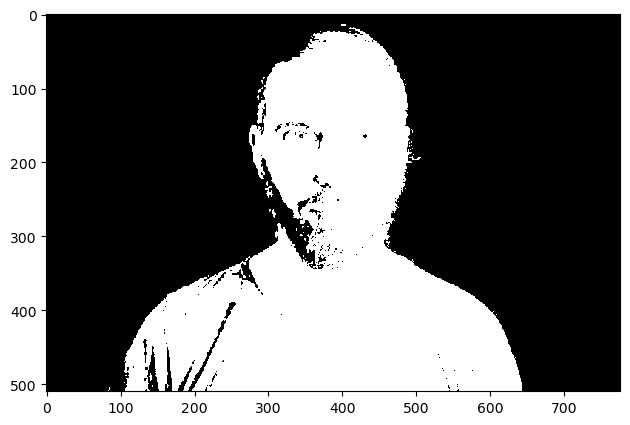

In [14]:
im_name = "dark_background.png"
im_org = io.imread(in_dir + im_name)

im_sil = silhouette(im_org, 10)
io.imshow(im_sil)

C:\Users\yufan\anaconda3\envs\course02502\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


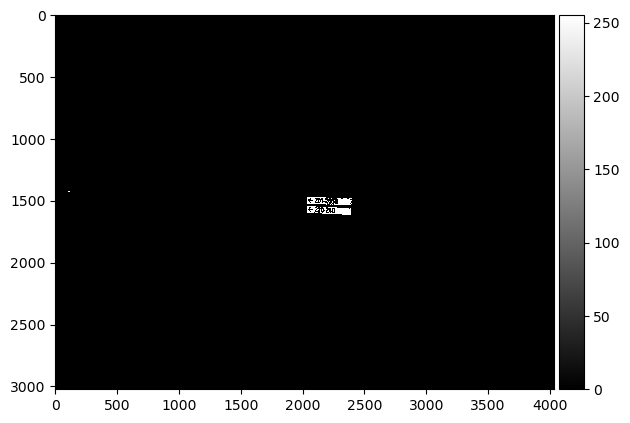

In [15]:
def detect_dtu_signs(img_in, color):
    r_comp = img_in[:, :, 0]
    g_comp = img_in[:, :, 1]
    b_comp = img_in[:, :, 2]
    
    if color == 'blue':
        segm = (r_comp < 10) & (g_comp > 85) & (g_comp < 105) & \
                (b_comp > 180) & (b_comp < 200)
    
    if color == 'red':
        segm = (r_comp > 160) & (r_comp < 180) & (g_comp > 50) & (g_comp < 80) & \
                    (b_comp > 50) & (b_comp < 80)
    
    return img_as_ubyte(segm)

im_name = "DTUSigns2.jpg"
im_org = io.imread(in_dir + im_name)
im_sign = detect_dtu_signs(im_org,'red')
io.imshow(im_sign, vmin = 0, vmax = 255, cmap = 'gray')

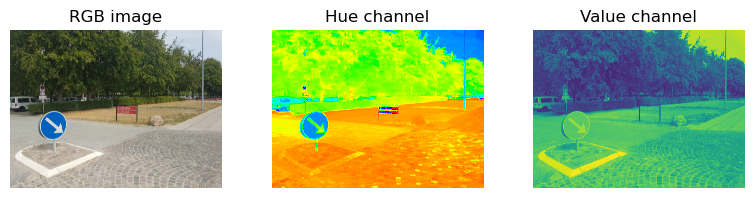

In [16]:
hsv_img = color.rgb2hsv(im_org)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))
ax0.imshow(im_org)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()
io.show()

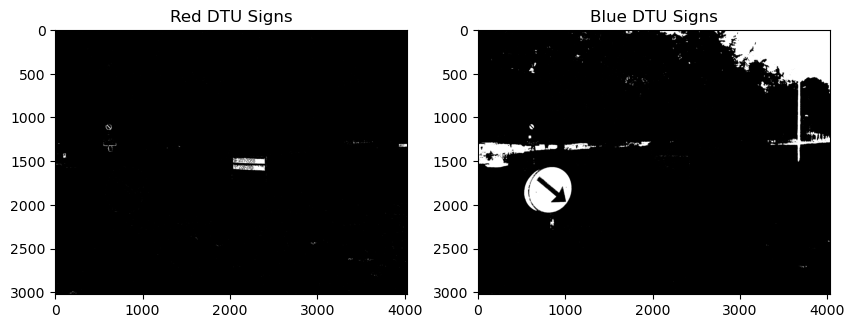

In [17]:
def detect_dtu_signs_hsv(img_in, c):
    hsv_img = color.rgb2hsv(img_in)
    hue_img = hsv_img[:, :, 0]
    
    if c == 'blue':
        segm = (hue_img > 150/360) & (hue_img < 240/360)
    
    if c == 'red':
        segm = (hue_img > 320/360) & (hue_img < 360/360)
    
    return img_as_ubyte(segm)

fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,5))

im_red_sign = detect_dtu_signs_hsv(im_org, 'red')
ax1.imshow(im_red_sign, cmap = 'gray')
ax1.set_title('Red DTU Signs')


im_blue_sign = detect_dtu_signs_hsv(im_org, 'blue')
ax2.imshow(im_blue_sign, cmap = 'gray')
ax2.set_title('Blue DTU Signs')

plt.show()